### Feature Selection Exercie

In this exercise, we will apply Feature Selection to a Iris flowers dataset, where the target variable is the Species. Essentially, our goal is to identify the features that are most relevant in discerning the species of each Iris flower. The dataset is from: https://www.kaggle.com/datasets/uciml/iris

1. Load the dataset from the exercise's Github Repository (Iris.csv)
2. Using buisness logic/common sense, drop features that are surely irrevelvant to the target variable.
3. Preprocess your data (split data into training and testing)
4. Apply feature selection.
6. Compare the results of each feature selection method:
    - What features did you manually dropped before applying the feature selection methods? Explain why.
    - Are there any common features selected across multiple methods?
    - Can you explain why certain features were selected based on their characteristics?

(Optional) Visualize the importance of features using techniques like bar charts or heatmaps to make it easier to compare.



In [1]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from scipy.stats import pearsonr, kendalltau
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("13-Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,YearCollected,MonthCollected,StigmaLegnth,Species
0,1,5.1,3.5,1.4,0.2,Purple,2003,2,2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Orange,1998,9,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Black,1995,5,3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,White,2008,3,3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Teal,2007,9,1,Iris-setosa


In [3]:
df.drop(inplace=True, columns=['YearCollected', 'MonthCollected', 'Id'])
X = df.drop('Species', axis=1)
y = df['Species']

encoder = LabelEncoder()
X['FlowerColour'] = encoder.fit_transform(X['FlowerColour'])
y_trans = encoder.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=32)

## Feature Selection

In [6]:
#Feature Selection with Pearson's

# Calculate correlations between features and 
y_train_df = pd.DataFrame(y_train, columns=['Target'])
# correlations = X_train.corrwith(y_train_df['Target'])

def pearson_corr(X, y):
    return X_train.corrwith(y_train_df['Target']).abs()

# Select top k features with highest absolute correlation
k = 3
selector = SelectKBest(score_func=pearson_corr, k=k)
selected_features_r = selector.fit(X_train, y_train).get_support(indices=True)

print("Features selected by Pearson's r:", X_train.columns[selected_features_r])

Features selected by Pearson's r: Index(['PetalLengthCm', 'FlowerColour', 'StigmaLegnth'], dtype='object')


In [7]:
#Feature Selection with Kendall's tau (τ)

# Calculate Kendall's tau for each feature with target
tau_scores = []
for feature in X_train.columns:
    tau, _ = kendalltau(X_train[feature], y_train)
    tau_scores.append(abs(tau))

# Select top k features with highest absolute tau
k = 3
selector = SelectKBest(score_func=lambda X, y: (tau_scores, [0] * len(tau_scores)), k=k)
selected_features_tau = selector.fit(X_train, y_train).get_support(indices=True)

# Print selected features
print("Features selected by Kendall's tau:", X_train.columns[selected_features_tau])

Features selected by Kendall's tau: Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [8]:
#Feature Selection with Mutual Information (MI)

# Calculate Mutual Information for each feature with target
mi_scores = mutual_info_regression(X_train, y_train)

# Select top k features with highest mutual information
k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selected_features_mi = selector.fit(X_train, y_train).get_support(indices=True)

# Print selected features
print("Features selected by Mutual Information:", X_train.columns[selected_features_mi])

Features selected by Mutual Information: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')


In [9]:
#Feature Selection with Logistic Regression with L1 penalty

# Fit Logistic Regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Get coefficients and select non-zero features
coefs = model.coef_[0]
selected_features_lr = X_train.columns[coefs != 0]

# Print selected features
print("Features selected by Logistic Regression L1:", selected_features_lr)

Features selected by Logistic Regression L1: Index(['SepalWidthCm', 'PetalLengthCm', 'FlowerColour', 'StigmaLegnth'], dtype='object')


## Correlation Visualization

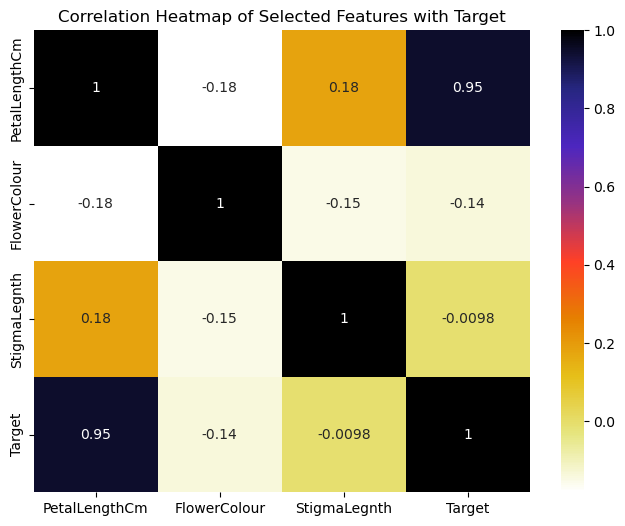

In [14]:
r = X_train[X_train.columns[selected_features_r]].copy()
r['Target'] = y_train
correlation_matrix = r.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

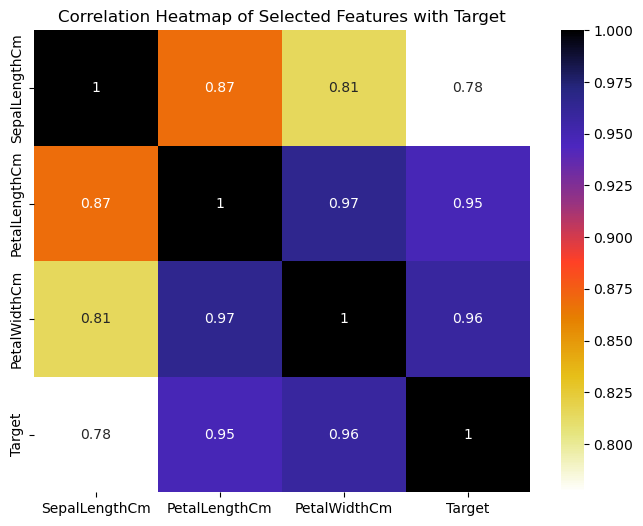

In [15]:
tau = X_train[X_train.columns[selected_features_tau]].copy()
tau['Target'] = y_train
correlation_matrix = tau.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

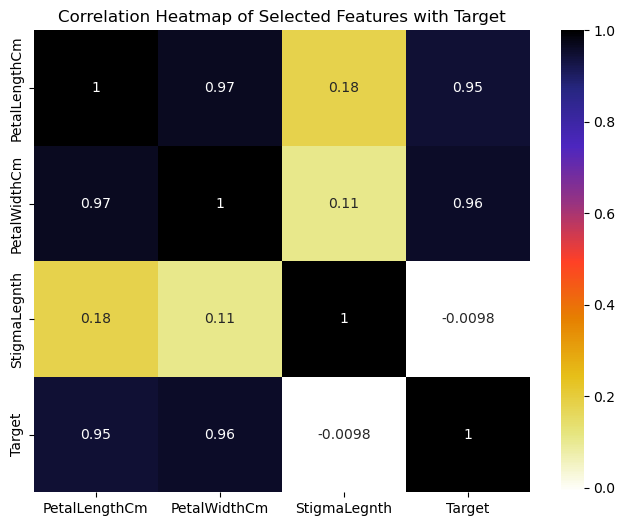

In [16]:
mi = X_train[X_train.columns[selected_features_mi]].copy()
mi['Target'] = y_train
correlation_matrix = mi.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

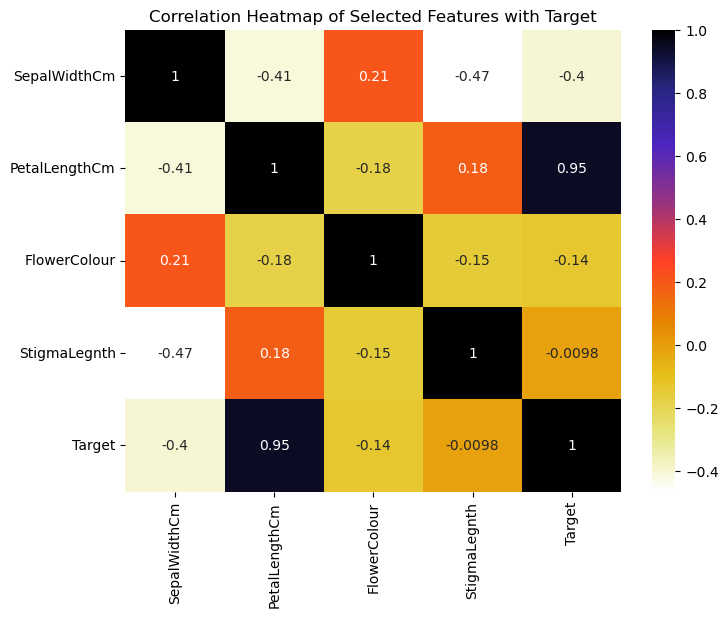

In [17]:
lr = X_train[selected_features_lr].copy()
lr['Target'] = y_train
correlation_matrix = lr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

## Compare the results of each feature selection method:

* What features did you manually dropped before applying the feature selection methods? Explain why.
  - Before implementing the feature selection methods, YearCollected, Id, and MonthCollected were excluded since they lack relevance and do not contribute significant information in identifying the correct species of the flower.

* Are there any common features selected across multiple methods?
  - PetalLengthCm is the only feature that is present in all methods. PetalWidthCm is also present in all methods except with Logistic Regression with L1 penalty. StigmaLength also occured for most methods except for the Kendall's tau method. 

* Can you explain why certain features were selected based on their characteristics? (Optional) Visualize the importance of features using techniques like bar charts or heatmaps to make it easier to compare.

For Pearson's R 
  - PetalLenghtCm and PetalWidthCm had the highest score at 0.95. FlowerColour had a low score at -0.07.
For Kendall's tau (τ) 
  - PetalLenghtCm and PetalWidthCm had the highest score at 0.95. SepalLengthCm had a good score at 0.76.
For Mutual Information (MI) 
  - PetalLenghtCm and PetalWidthCm had the highest score at 0.95. StigmaLength had a low score at 0.02.
For Logistic Regression with L1 Penalty 
  - PetalLenghtCm had the highest score at 0.95
  
The top score was achieved by PetalLengthCm and PetalWidthCm, both reaching 0.95 across all methods, except for Logistic Regression, where PetalWidthCm was not included. These attributes were likely selected due to their robust correlation with the target variable.